In [1]:
import os
from getpass import getpass


# **Load documents**


## PDFs

In [4]:
import requests
from langchain.document_loaders import PyPDFLoader

In [7]:
urls = ['https://arxiv.org/pdf/2306.06031v1.pdf','https://arxiv.org/pdf/2306.12156v1.pdf','https://arxiv.org/pdf/2306.14289v1.pdf','https://arxiv.org/pdf/2305.10973v1.pdf','https://arxiv.org/pdf/2306.13643v1.pdf']
ml_papers = []

for i, url in enumerate(urls):
    
    filename = f'./Papers/paper{i+1}.pdf'

    if not os.path.exists(filename):
        response = requests.get(url)
        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f'Descargado {filename}')
    else:
        print(f'{filename} ya existe, cargando desde el disco.')

    loader = PyPDFLoader(filename)
    data = loader.load()
    ml_papers.extend(data)

./Papers/paper1.pdf ya existe, cargando desde el disco.
./Papers/paper2.pdf ya existe, cargando desde el disco.
./Papers/paper3.pdf ya existe, cargando desde el disco.
./Papers/paper4.pdf ya existe, cargando desde el disco.
./Papers/paper5.pdf ya existe, cargando desde el disco.


In [8]:
print(type(ml_papers), len(ml_papers))

<class 'list'> 57


In [9]:
print(ml_papers[3])

page_content='Figure 1: FinGPT Framework.
4.1 Data Sources
The first stage of the FinGPT pipeline involves the collec-
tion of extensive financial data from a wide array of online
sources. These include, but are not limited to:
• Financial news: Websites such as Reuters, CNBC, Yahoo
Finance, among others, are rich sources of financial news
and market updates. These sites provide valuable informa-
tion on market trends, company earnings, macroeconomic
indicators, and other financial events.
• Social media: Platforms such as Twitter, Facebook, Red-
dit, Weibo, and others, offer a wealth of information in
terms of public sentiment, trending topics, and immediate
reactions to financial news and events.
• Filings: Websites of financial regulatory authorities, such
as the SEC in the United States, offer access to company
filings. These filings include annual reports, quarterly earn-
ings, insider trading reports, and other important company-
specific information. Official websites of stock e

## Split document

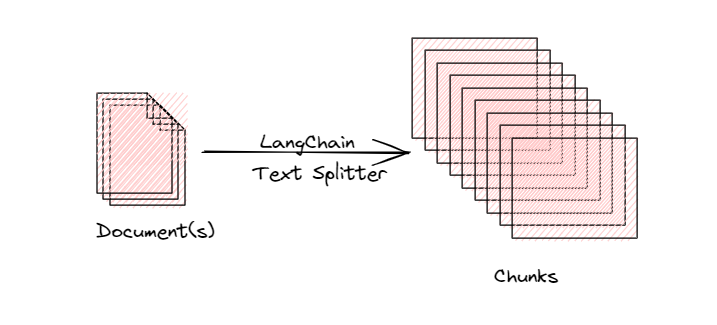

In [10]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1500,
    chunk_overlap=200,
    length_function=len
)

documents = text_splitter.split_documents(ml_papers)

In [11]:
print(len(documents), documents[10])

211 page_content='highly volatile, changing rapidly in response to news events
or market movements.
Trends, often observable through websites like Seeking
Alpha, Google Trends, and other finance-oriented blogs and
forums, offer critical insights into market movements and in-
vestment strategies. They feature:
• Analyst perspectives: These platforms provide access to
market predictions and investment advice from seasoned
financial analysts and experts.
• Market sentiment: The discourse on these platforms can
reflect the collective sentiment about specific securities,
sectors, or the overall market, providing valuable insights
into the prevailing market mood.
• Broad coverage: Trends data spans diverse securities and
market segments, offering comprehensive market coverage.
Each of these data sources provides unique insights into
the financial world. By integrating these diverse data types,
financial language models like FinGPT can facilitate a com-
prehensive understanding of financial m

## Embeddings

In [17]:
from langchain_ollama import OllamaEmbeddings
from langchain.vectorstores import Chroma

embeddings = OllamaEmbeddings(model="nomic-embed-text")
vectorstore = Chroma.from_documents(
    documents=documents, 
    embedding=embeddings
    )

retriever = vectorstore.as_retriever(
    search_kwargs={"k": 3}
    )


# **Questions**

In [27]:
from langchain_community.chat_models import ChatOllama
from langchain.chains import RetrievalQA

llm = ChatOllama(model="llama3.2:1b",
                temperature=0)

qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=retriever
)


In [28]:
query = "qué es fingpt?"
print(qa_chain.run(query))

/tmp/ipykernel_8212/2667408446.py:2: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  print(qa_chain.run(query))


Según el texto proporcionado, FingPT (Financial Graphical Intelligence Platform) es una plataforma que ofrece herramientas y aplicaciones prácticas para realizar tareas financieras, como servicios de robo advisory, trading cuantitativo y desarrollo de código bajo licencia. También menciona que tiene un enfoque transformador en el uso de LLMs (Large Language Models) en la finanza.
